**Plan**: \
scrape data \
clean/preprocess \
bert \
clustering \
visualization

Consider [distilbert](https://huggingface.co/docs/transformers/model_doc/distilbert) for efficiency. Or roberta (newer)


In [1]:
import torch
import numpy as np
from transformers import DistilBertModel, DistilBertTokenizer
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
import matplotlib.pyplot as plt

c:\Users\ericz\miniconda3\envs\cc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load base DISTILBERT model


In [2]:
model_class, tokenizer_class, pretrained_weights = (DistilBertModel, DistilBertTokenizer, 'distilbert-base-uncased')

tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [3]:
texts = ["I hate you", "You're a nice person!", "I like you", "You're good!", "You suck", "Fuck you", "You're an angel"]

In [4]:
embeddings = []
for text in texts:
  tokens = tokenizer.encode(text, add_special_tokens=True)
  input_ids = torch.tensor([tokens])

  with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state

  sentence_embedding = torch.mean(last_hidden_states, dim=1).squeeze()
  embeddings.append(sentence_embedding)

In [5]:
X = np.array(embeddings)

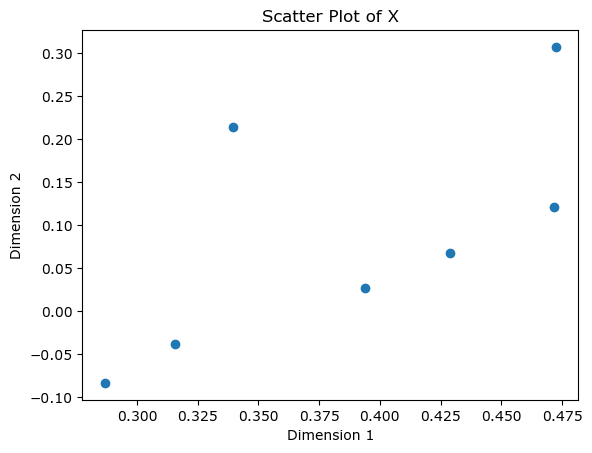

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot of X')
plt.show()

In [8]:
# cluster = DBSCAN(eps=2, min_samples=2)
# cluster = KMeans(n_clusters=2, random_state=42)
cluster = AffinityPropagation(random_state=42)
cluster_labels = cluster.fit_predict(X)

print(cluster_labels)

[0 1 0 1 2 2 1]
